In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# data partition
from math import ceil


import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_sas('a2z_insurance.sas7bdat')
df.head()

,CustID,FirstPolYear,BirthYear,EducDeg,MonthSal,GeoLivArea,Children,CustMonVal,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,PremWork
0,1.0,1985.0,1982.0,b'2 - High School',2177.0,1.0,1.0,380.97,0.39,375.85,79.45,146.36,47.01,16.89
1,2.0,1981.0,1995.0,b'2 - High School',677.0,4.0,1.0,-131.13,1.12,77.46,416.20,116.69,194.48,106.13
2,3.0,1991.0,1970.0,b'1 - Basic',2277.0,3.0,0.0,504.67,0.28,206.15,224.50,124.58,86.35,99.02
3,4.0,1990.0,1981.0,b'3 - BSc/MSc',1099.0,4.0,1.0,-16.99,0.99,182.48,43.35,311.17,35.34,28.34
4,5.0,1986.0,1973.0,b'3 - BSc/MSc',1763.0,4.0,1.0,35.23,0.90,338.62,47.80,182.59,18.78,41.45


In [3]:
df.shape

(10296, 14)

In [4]:
df.columns

Index(['CustID', 'FirstPolYear', 'BirthYear', 'EducDeg', 'MonthSal',
       'GeoLivArea', 'Children', 'CustMonVal', 'ClaimsRate', 'PremMotor',
       'PremHousehold', 'PremHealth', 'PremLife', 'PremWork'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10296 entries, 0 to 10295
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CustID         10296 non-null  float64
 1   FirstPolYear   10266 non-null  float64
 2   BirthYear      10279 non-null  float64
 3   EducDeg        10279 non-null  object 
 4   MonthSal       10260 non-null  float64
 5   GeoLivArea     10295 non-null  float64
 6   Children       10275 non-null  float64
 7   CustMonVal     10296 non-null  float64
 8   ClaimsRate     10296 non-null  float64
 9   PremMotor      10262 non-null  float64
 10  PremHousehold  10296 non-null  float64
 11  PremHealth     10253 non-null  float64
 12  PremLife       10192 non-null  float64
 13  PremWork       10210 non-null  float64
dtypes: float64(13), object(1)
memory usage: 1.1+ MB


In [6]:
df.isna().sum()

CustID             0
FirstPolYear      30
BirthYear         17
EducDeg           17
MonthSal          36
GeoLivArea         1
Children          21
CustMonVal         0
ClaimsRate         0
PremMotor         34
PremHousehold      0
PremHealth        43
PremLife         104
PremWork          86
dtype: int64

In [7]:
metric_features=['FirstPolYear', 'BirthYear', 'MonthSal',
       'GeoLivArea', 'Children', 'CustMonVal', 'ClaimsRate', 'PremMotor',
       'PremHousehold', 'PremHealth', 'PremLife', 'PremWork']
non_metric_features = ['EducDeg']

In [8]:
df.describe() #Descrição numérica e categórica de todas as colunas

,CustID,FirstPolYear,BirthYear,MonthSal,GeoLivArea,Children,CustMonVal,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,PremWork
count,10296.00000,10266.000000,10279.000000,10260.000000,10295.000000,10275.000000,10296.000000,10296.000000,10262.000000,10296.000000,10253.000000,10192.000000,10210.000000
mean,5148.50000,1991.062634,1968.007783,2506.667057,2.709859,0.706764,177.892605,0.742772,300.470252,210.431192,171.580833,41.855782,41.277514
std,2972.34352,511.267913,19.709476,1157.449634,1.266291,0.455268,1945.811505,2.916964,211.914997,352.595984,296.405976,47.480632,51.513572
min,1.00000,1974.000000,1028.000000,333.000000,1.000000,0.000000,-165680.420000,0.000000,-4.110000,-75.000000,-2.110000,-7.000000,-12.000000
25%,2574.75000,1980.000000,1953.000000,1706.000000,1.000000,0.000000,-9.440000,0.390000,190.590000,49.450000,111.800000,9.890000,10.670000
50%,5148.50000,1986.000000,1968.000000,2501.500000,3.000000,1.000000,186.870000,0.720000,298.610000,132.800000,162.810000,25.560000,25.670000
75%,7722.25000,1992.000000,1983.000000,3290.250000,4.000000,1.000000,399.777500,0.980000,408.300000,290.050000,219.820000,57.790000,56.790000
max,10296.00000,53784.000000,2001.000000,55215.000000,4.000000,1.000000,11875.890000,256.200000,11604.420000,25048.800000,28272.000000,398.300000,1988.700000


In [9]:
df[df.isna().any(axis=1)]

,CustID,FirstPolYear,BirthYear,EducDeg,MonthSal,GeoLivArea,Children,CustMonVal,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,PremWork
21,22.0,1977.0,1958.0,b'2 - High School',NaN,3.0,1.0,111.37,0.80,407.52,111.70,100.13,24.67,30.34
68,69.0,1983.0,1977.0,b'2 - High School',1399.0,4.0,1.0,476.65,0.33,330.73,186.70,211.15,NaN,15.78
138,139.0,1979.0,1976.0,b'2 - High School',2538.0,2.0,1.0,149.59,0.69,194.26,305.60,NaN,37.34,17.67
143,144.0,1996.0,1990.0,b'3 - BSc/MSc',NaN,4.0,1.0,-42.45,1.02,146.36,353.95,220.04,121.80,42.01
184,185.0,1993.0,1984.0,b'2 - High School',2419.0,4.0,1.0,-62.23,1.07,NaN,253.95,230.60,5.89,43.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10010,10011.0,NaN,1947.0,b'2 - High School',3959.0,2.0,NaN,-128.24,1.14,177.81,153.35,311.28,67.79,35.45
10057,10058.0,1983.0,1980.0,b'2 - High School',1569.0,4.0,1.0,222.60,0.55,235.60,211.15,NaN,32.34,68.79
10142,10143.0,1986.0,1985.0,b'3 - BSc/MSc',1652.0,3.0,1.0,55.67,0.88,257.05,94.45,308.39,NaN,13.78
10284,10285.0,1980.0,1987.0,b'3 - BSc/MSc',1504.0,4.0,1.0,-1.55,0.96,390.63,29.45,179.70,-6.00,NaN


In [10]:
PremZero=df[['PremMotor','PremHousehold','PremHealth','PremLife','PremWork']] == 0

In [11]:
PremZero.value_counts()

PremMotor  PremHousehold  PremHealth  PremLife  PremWork
False      False          False       False     False       10236
           True           False       False     False          60
dtype: int64

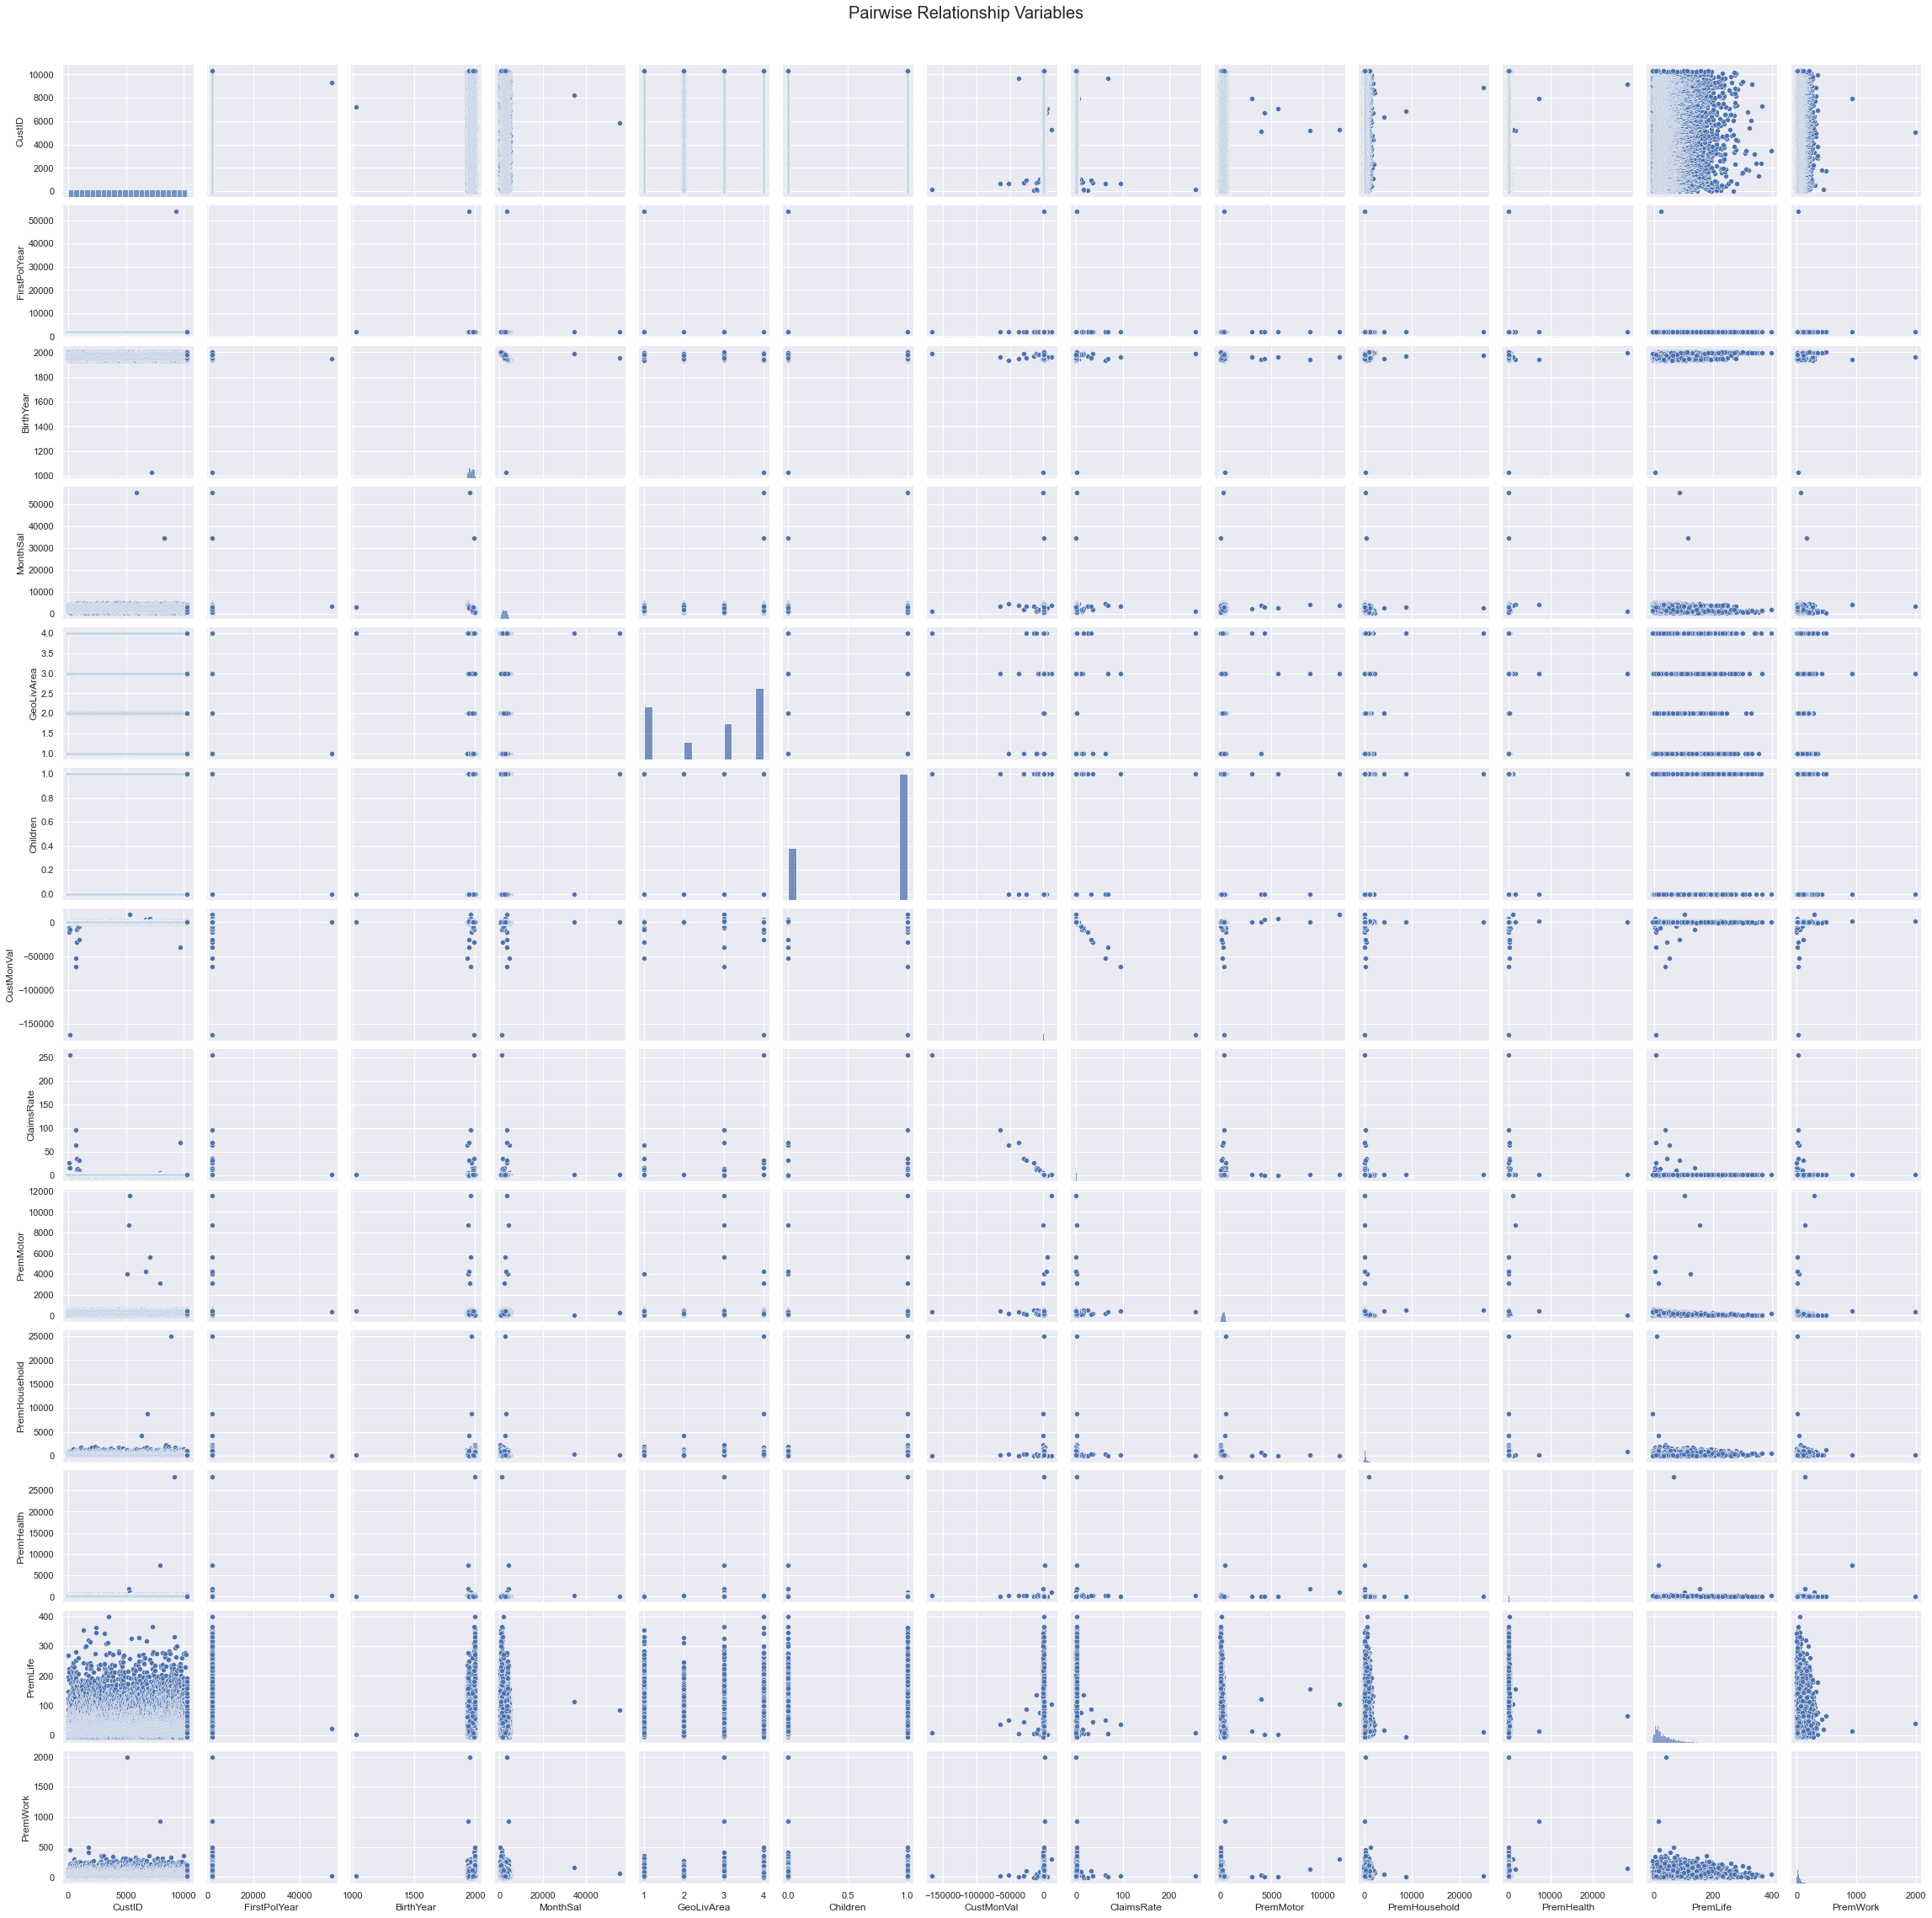

In [71]:
# Pairwise Relationship of Numerical Variables
sns.set()

# Setting pairplot
sns.pairplot(df )#diag_kind="hist"

# Layout
plt.subplots_adjust(top=0.95)
plt.suptitle("Pairwise Relationship Variables", fontsize=20)

plt.show()

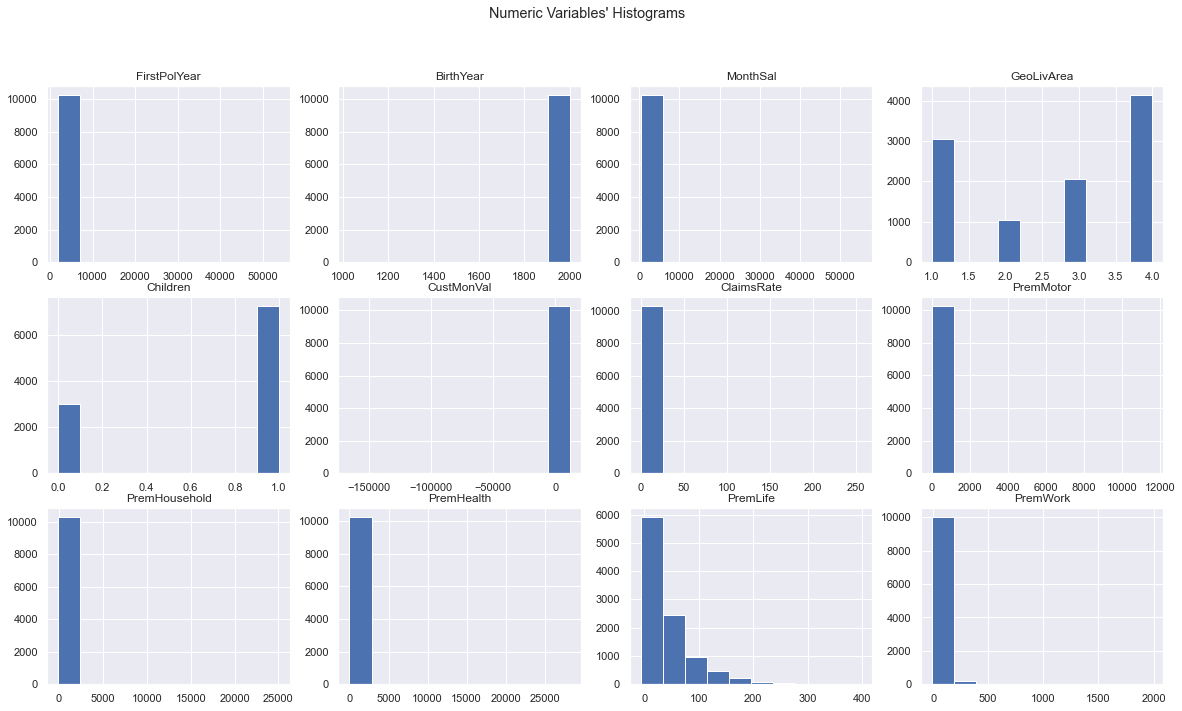

In [13]:
# All Numeric Variables' Histograms in one figure
sns.set()

# Prepare figure. Create individual axes where each histogram will be placed
fig, axes = plt.subplots(3, ceil(len(metric_features) / 3), figsize=(20, 11))

# Plot data
# Iterate across axes objects and associate each histogram (hint: use the ax.hist() instead of plt.hist()):
for ax, feat in zip(axes.flatten(), metric_features): # Notice the zip() function and flatten() method
    # CODE HERE (extra: set each axis title as the feature name)
    ax.hist(df[feat])
    ax.set_title(feat)

    
# Layout
# Add a centered title to the figure:
title = "Numeric Variables' Histograms"

plt.suptitle(title)

plt.show()

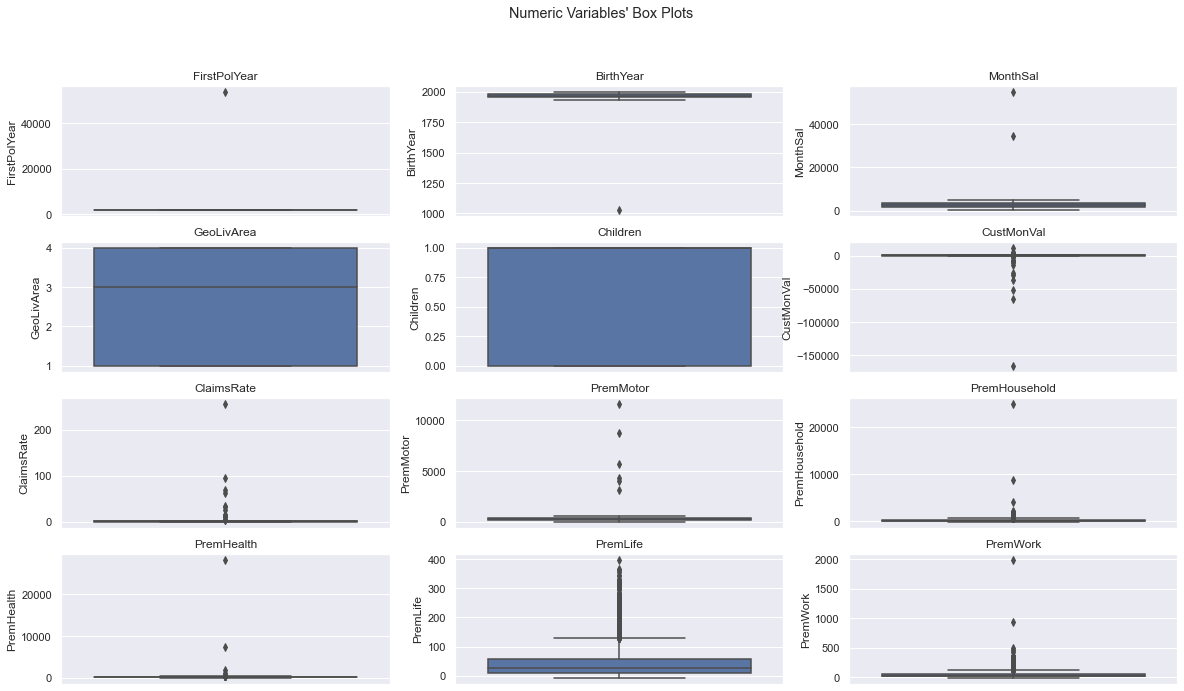

In [14]:
# All Numeric Variables' Box Plots in one figure
sns.set()

# Prepare figure. Create individual axes where each box plot will be placed
fig, axes = plt.subplots(4, ceil(len(metric_features) / 4), figsize=(20, 11))

# Plot data
# Iterate across axes objects and associate each box plot (hint: use the ax argument):
for ax, feat in zip(axes.flatten(), metric_features): # Notice the zip() function and flatten() method
    # CODE HERE
    sns.boxplot(y=df[feat] , ax=ax)
    ax.set_title(feat)
    
# Layout
# Add a centered title to the figure:
title = "Numeric Variables' Box Plots"

plt.suptitle(title)

plt.show()

Create a df without rows with NaN values

In [15]:
# print(df)
is_NaN = df. isnull()
row_has_NaN = is_NaN. any(axis=1)
rows_with_NaN = df[row_has_NaN]
df_noNaN=df[~row_has_NaN]
print(len(rows_with_NaN),len(rows_with_NaN)/len(df)*100)
print(len(df_noNaN))

309 3.0011655011655014
9987


## Z-Score

In [16]:
count=0
for feature in df[metric_features].columns:
    zscore=pd.Series(df[feature] - df[feature].mean() ) / df[feature].std()
#     print(zscore[zscore>3])
    count+=(len(zscore[zscore>3])+len(zscore[zscore<-3]))
    print(feature,len(zscore[zscore>3])+len(zscore[zscore<-3]),(len(zscore[zscore>3])+len(zscore[zscore<-3]))/len(df)*100)
print()
print(count/len(df)*100)

FirstPolYear 1 0.009712509712509712
BirthYear 1 0.009712509712509712
MonthSal 2 0.019425019425019424
GeoLivArea 0 0.0
Children 0 0.0
CustMonVal 13 0.12626262626262627
ClaimsRate 12 0.11655011655011654
PremMotor 6 0.05827505827505827
PremHousehold 36 0.34965034965034963
PremHealth 3 0.029137529137529136
PremLife 210 2.0396270396270397
PremWork 159 1.5442890442890442

4.302641802641802


In [17]:
zscore

0       -0.473419
1        1.258940
2        1.120918
3       -0.251148
4        0.003348
           ...   
10291   -0.514379
10292    1.239527
10293   -0.706368
10294    1.390556
10295   -0.551069
Name: PremWork, Length: 10296, dtype: float64

In [18]:
count=0
for feature in df_noNaN[metric_features].columns:
    zscore=pd.Series(df_noNaN[feature] - df_noNaN[feature].mean() ) / df_noNaN[feature].std()
    df_noNaN["zscore"]=(df_noNaN[feature] - df_noNaN[feature].mean() ) / df_noNaN[feature].std()
#     print(zscore[zscore>3])
    count+=(len(zscore[zscore>3])+len(zscore[zscore<-3]))
    df_noNaN["zscore_outliers"]=df_noNaN["zscore"].apply(lambda x: -1 if ((x>3) & (x<-3)) else 1)
    #print(feature,len(zscore[zscore>3])+len(zscore[zscore<-3]),(len(zscore[zscore>3])+len(zscore[zscore<-3]))/len(df)*100)
print()
print(count/len(df_noNaN)*100)


4.345649344147392


## LOF

In [19]:
##To review

# import the algorithm
from sklearn.neighbors import LocalOutlierFactor
#initialise the algorithm
lof = LocalOutlierFactor(n_neighbors = 20)
#fit it to the training data, since we don't use it for novelty than
# this is fine
y_pred = lof.fit_predict(df_noNaN[metric_features])
#extract the predictions as strings
df_noNaN["lof_outliers"] = y_pred.astype(str)
#print the number of outliers relative to non-outliers
print(df_noNaN["lof_outliers"].value_counts())
#extract the outlier scores
# df_noNaN["lof_scores"] = lof.negative_outlier_factor_
#print(len(df_noNaN[df_noNaN["iso_forest_outliers"]=="-1"])/len(df)*100)

1     9894
-1      93
Name: lof_outliers, dtype: int64


In [20]:
len(df.columns)

14

## Isolation Forest

In [21]:
from sklearn.ensemble import IsolationForest#create the method instance
isf = IsolationForest(n_estimators = 100, random_state = 42, contamination = 0.02)
#use fit_predict on the data as we are using all the data
preds = isf.fit_predict(df_noNaN[metric_features])
#extract outliers from the data
df_noNaN["iso_forest_outliers"] = preds
df_noNaN["iso_forest_outliers"] = df_noNaN["iso_forest_outliers"].astype(str)
#extract the scores from the data in terms of strength of outlier
df_noNaN["iso_forest_scores"] = isf.decision_function(df_noNaN[metric_features])#print how many outliers the data suggests
print(df_noNaN["iso_forest_outliers"].value_counts())# Out:
print(len(df_noNaN[df_noNaN["iso_forest_outliers"]=="-1"])/len(df)*100)

1     9787
-1     200
Name: iso_forest_outliers, dtype: int64
1.9425019425019423


In [22]:
df_withoutOutliers=df.iloc[df_noNaN[df_noNaN['iso_forest_outliers']=="1"].index]
df_withoutOutliers

,CustID,FirstPolYear,BirthYear,EducDeg,MonthSal,GeoLivArea,Children,CustMonVal,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,PremWork
0,1.0,1985.0,1982.0,b'2 - High School',2177.0,1.0,1.0,380.97,0.39,375.85,79.45,146.36,47.01,16.89
1,2.0,1981.0,1995.0,b'2 - High School',677.0,4.0,1.0,-131.13,1.12,77.46,416.20,116.69,194.48,106.13
2,3.0,1991.0,1970.0,b'1 - Basic',2277.0,3.0,0.0,504.67,0.28,206.15,224.50,124.58,86.35,99.02
3,4.0,1990.0,1981.0,b'3 - BSc/MSc',1099.0,4.0,1.0,-16.99,0.99,182.48,43.35,311.17,35.34,28.34
4,5.0,1986.0,1973.0,b'3 - BSc/MSc',1763.0,4.0,1.0,35.23,0.90,338.62,47.80,182.59,18.78,41.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10290,10291.0,1994.0,1999.0,b'1 - Basic',626.0,3.0,1.0,176.26,0.85,6.89,878.50,103.13,113.02,201.26
10291,10292.0,1984.0,1949.0,b'4 - PhD',3188.0,2.0,0.0,-0.11,0.96,393.74,49.45,173.81,9.78,14.78
10293,10294.0,1994.0,1976.0,b'3 - BSc/MSc',2918.0,1.0,1.0,524.10,0.21,403.63,132.80,142.25,12.67,4.89
10294,10295.0,1981.0,1977.0,b'1 - Basic',1971.0,2.0,1.0,250.05,0.65,188.59,211.15,198.37,63.90,112.91


In [70]:
# # Pairwise Relationship of Numerical Variables
# sns.set()

# # Setting pairplot
# sns.pairplot(df_noNaN, diag_kind="hist",hue="iso_forest_outliers")

# # Layout
# plt.subplots_adjust(top=0.95)
# plt.suptitle("Pairwise Relationship of Numerical Variables", fontsize=20)

# plt.show()

KeyboardInterrupt: 

In [24]:
df_noNaN.head(2)

,CustID,FirstPolYear,BirthYear,EducDeg,MonthSal,GeoLivArea,Children,CustMonVal,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,PremWork,zscore,zscore_outliers,lof_outliers,iso_forest_outliers,iso_forest_scores
0,1.0,1985.0,1982.0,b'2 - High School',2177.0,1.0,1.0,380.97,0.39,375.85,79.45,146.36,47.01,16.89,-0.475733,1,1,1,0.151856
1,2.0,1981.0,1995.0,b'2 - High School',677.0,4.0,1.0,-131.13,1.12,77.46,416.20,116.69,194.48,106.13,1.249263,1,1,1,0.042808


## DBScan Outlier Detection

In [25]:
#import the algorithm
from sklearn.cluster import DBSCAN
#initiate the algorithm
#set the distance to 20, and min_samples as 5
outlier_detection = DBSCAN(eps = 20, metric = "euclidean", min_samples = 10, n_jobs = -1)
#fit_predict the algorithm to the existing data
clusters = outlier_detection.fit_predict(df_noNaN[metric_features])
#extract the labels from the algorithm
df_noNaN["dbscan_outliers"] = clusters
#label all others as inliers 
df_noNaN["dbscan_outliers"] = df_noNaN["dbscan_outliers"].apply(lambda x: str(1) if x>-1 else str(-1))
#print the vaue counts
print(df_noNaN["dbscan_outliers"].value_counts())

-1    9987
Name: dbscan_outliers, dtype: int64


### NOTE: THERE ARE NO CLEAR CLUSTERS , THE DATA IS VERY SPARSE 

In [26]:
df_noNaN.head(2)

,CustID,FirstPolYear,BirthYear,EducDeg,MonthSal,GeoLivArea,Children,CustMonVal,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,PremWork,zscore,zscore_outliers,lof_outliers,iso_forest_outliers,iso_forest_scores,dbscan_outliers
0,1.0,1985.0,1982.0,b'2 - High School',2177.0,1.0,1.0,380.97,0.39,375.85,79.45,146.36,47.01,16.89,-0.475733,1,1,1,0.151856,-1
1,2.0,1981.0,1995.0,b'2 - High School',677.0,4.0,1.0,-131.13,1.12,77.46,416.20,116.69,194.48,106.13,1.249263,1,1,1,0.042808,-1


In [27]:
#extract the sum of the outlier count
df_noNaN['outliers_sum'] = (df_noNaN['iso_forest_outliers'].astype(int)+
                           df_noNaN['lof_outliers'].astype(int)+
                           df_noNaN['zscore_outliers'].astype(int))
#print the value counts for eacdf_noNaNh scale
print(df_noNaN["outliers_sum"].value_counts())

 3    9719
 1     243
-1      25
Name: outliers_sum, dtype: int64


#### WITH ALL THESE 3 METHODS , THERE WERE 29 OBSERVATIONS HAVE CONSIDERES AS OUTLIERS FOR AT LEAST 2 METHODS

In [28]:
df_noNaN[['iso_forest_outliers','lof_outliers','zscore_outliers','outliers_sum']].loc[df_noNaN['outliers_sum']==-1]

,iso_forest_outliers,lof_outliers,zscore_outliers,outliers_sum
675,-1,-1,1,-1
1069,-1,-1,1,-1
1745,-1,-1,1,-1
2323,-1,-1,1,-1
2887,-1,-1,1,-1
3484,-1,-1,1,-1
4373,-1,-1,1,-1
5084,-1,-1,1,-1
5211,-1,-1,1,-1
5293,-1,-1,1,-1


In [29]:
df_noNaN.tail(10)

,CustID,FirstPolYear,BirthYear,EducDeg,MonthSal,GeoLivArea,Children,CustMonVal,ClaimsRate,PremMotor,...,PremHealth,PremLife,PremWork,zscore,zscore_outliers,lof_outliers,iso_forest_outliers,iso_forest_scores,dbscan_outliers,outliers_sum
10286,10287.0,1997.0,1943.0,b'3 - BSc/MSc',3975.0,2.0,0.0,220.27,0.62,285.61,...,241.49,31.45,8.89,-0.630371,1,1,1,0.099940,-1,3
10287,10288.0,1996.0,1941.0,b'2 - High School',3845.0,4.0,0.0,99.47,0.90,87.35,...,121.58,157.92,33.45,-0.155630,1,1,1,0.025413,-1,3
10288,10289.0,1982.0,1993.0,b'2 - High School',1465.0,1.0,1.0,795.15,0.35,67.79,...,102.13,182.48,86.46,0.869045,1,1,1,0.035436,-1,3
10289,10290.0,1986.0,1943.0,b'2 - High School',3498.0,4.0,0.0,245.60,0.67,227.82,...,160.92,100.13,69.90,0.548943,1,1,1,0.120988,-1,3
10290,10291.0,1994.0,1999.0,b'1 - Basic',626.0,3.0,1.0,176.26,0.85,6.89,...,103.13,113.02,201.26,3.088111,1,1,1,0.009481,-1,3
10291,10292.0,1984.0,1949.0,b'4 - PhD',3188.0,2.0,0.0,-0.11,0.96,393.74,...,173.81,9.78,14.78,-0.516518,1,1,1,0.135174,-1,3
10292,10293.0,1977.0,1952.0,b'1 - Basic',2431.0,3.0,0.0,1405.60,0.00,133.58,...,143.25,12.89,105.13,1.229933,1,-1,-1,-0.031528,-1,-1
10293,10294.0,1994.0,1976.0,b'3 - BSc/MSc',2918.0,1.0,1.0,524.10,0.21,403.63,...,142.25,12.67,4.89,-0.707691,1,1,1,0.145502,-1,3
10294,10295.0,1981.0,1977.0,b'1 - Basic',1971.0,2.0,1.0,250.05,0.65,188.59,...,198.37,63.90,112.91,1.380319,1,1,1,0.121313,-1,3
10295,10296.0,1990.0,1981.0,b'4 - PhD',2815.0,1.0,1.0,463.75,0.27,414.08,...,141.25,6.89,12.89,-0.553052,1,1,1,0.155189,-1,3


In [30]:
indexes=df_noNaN[['iso_forest_outliers','lof_outliers','zscore_outliers','outliers_sum']].loc[df_noNaN['outliers_sum']==-1].index

In [31]:
indexes

Int64Index([  675,  1069,  1745,  2323,  2887,  3484,  4373,  5084,  5211,
             5293,  6270,  6742,  7961,  8366,  8425,  8591,  8667,  8741,
             8872,  9149,  9235,  9390,  9555,  9954, 10292],
           dtype='int64')

In [32]:
df_noNaN.shape

(9987, 21)

In [33]:
df_noNaN_with_outliers= df_noNaN.index.isin(indexes)


In [34]:
df_noNaN_without_outliers= df_noNaN[~df_noNaN_with_outliers]

In [35]:
df_noNaN_without_outliers.shape

(9962, 21)

 #### df_noNaN_without_outliers is the dataset with the outliers removed , now we will do the missing values imputing 

In [36]:
df_num=df[['CustID', 'FirstPolYear', 'BirthYear', 'MonthSal',
       'GeoLivArea', 'Children', 'CustMonVal', 'ClaimsRate', 'PremMotor',
       'PremHousehold', 'PremHealth', 'PremLife', 'PremWork']]

In [37]:
df_cat=df[['EducDeg']]

## FillNA com KNN Inputer

In [38]:
df_toFill=pd.concat([df_noNaN_without_outliers,rows_with_NaN]).sort_index()
df_toFill

,CustID,FirstPolYear,BirthYear,EducDeg,MonthSal,GeoLivArea,Children,CustMonVal,ClaimsRate,PremMotor,...,PremHealth,PremLife,PremWork,zscore,zscore_outliers,lof_outliers,iso_forest_outliers,iso_forest_scores,dbscan_outliers,outliers_sum
0,1.0,1985.0,1982.0,b'2 - High School',2177.0,1.0,1.0,380.97,0.39,375.85,...,146.36,47.01,16.89,-0.475733,1.0,1,1,0.151856,-1,3.0
1,2.0,1981.0,1995.0,b'2 - High School',677.0,4.0,1.0,-131.13,1.12,77.46,...,116.69,194.48,106.13,1.249263,1.0,1,1,0.042808,-1,3.0
2,3.0,1991.0,1970.0,b'1 - Basic',2277.0,3.0,0.0,504.67,0.28,206.15,...,124.58,86.35,99.02,1.111828,1.0,1,1,0.089588,-1,3.0
3,4.0,1990.0,1981.0,b'3 - BSc/MSc',1099.0,4.0,1.0,-16.99,0.99,182.48,...,311.17,35.34,28.34,-0.254406,1.0,1,1,0.124512,-1,3.0
4,5.0,1986.0,1973.0,b'3 - BSc/MSc',1763.0,4.0,1.0,35.23,0.90,338.62,...,182.59,18.78,41.45,-0.000992,1.0,1,1,0.181349,-1,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10290,10291.0,1994.0,1999.0,b'1 - Basic',626.0,3.0,1.0,176.26,0.85,6.89,...,103.13,113.02,201.26,3.088111,1.0,1,1,0.009481,-1,3.0
10291,10292.0,1984.0,1949.0,b'4 - PhD',3188.0,2.0,0.0,-0.11,0.96,393.74,...,173.81,9.78,14.78,-0.516518,1.0,1,1,0.135174,-1,3.0
10293,10294.0,1994.0,1976.0,b'3 - BSc/MSc',2918.0,1.0,1.0,524.10,0.21,403.63,...,142.25,12.67,4.89,-0.707691,1.0,1,1,0.145502,-1,3.0
10294,10295.0,1981.0,1977.0,b'1 - Basic',1971.0,2.0,1.0,250.05,0.65,188.59,...,198.37,63.90,112.91,1.380319,1.0,1,1,0.121313,-1,3.0


In [39]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=3).fit(df_toFill[metric_features])
filled_df = imputer.transform(df_toFill[metric_features])

In [40]:
filled_df=pd.DataFrame(filled_df, index=df_toFill[metric_features].index , columns=df_toFill[metric_features].columns)
filled_df

,FirstPolYear,BirthYear,MonthSal,GeoLivArea,Children,CustMonVal,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,PremWork
0,1985.0,1982.0,2177.0,1.0,1.0,380.97,0.39,375.85,79.45,146.36,47.01,16.89
1,1981.0,1995.0,677.0,4.0,1.0,-131.13,1.12,77.46,416.20,116.69,194.48,106.13
2,1991.0,1970.0,2277.0,3.0,0.0,504.67,0.28,206.15,224.50,124.58,86.35,99.02
3,1990.0,1981.0,1099.0,4.0,1.0,-16.99,0.99,182.48,43.35,311.17,35.34,28.34
4,1986.0,1973.0,1763.0,4.0,1.0,35.23,0.90,338.62,47.80,182.59,18.78,41.45
...,...,...,...,...,...,...,...,...,...,...,...,...
10290,1994.0,1999.0,626.0,3.0,1.0,176.26,0.85,6.89,878.50,103.13,113.02,201.26
10291,1984.0,1949.0,3188.0,2.0,0.0,-0.11,0.96,393.74,49.45,173.81,9.78,14.78
10293,1994.0,1976.0,2918.0,1.0,1.0,524.10,0.21,403.63,132.80,142.25,12.67,4.89
10294,1981.0,1977.0,1971.0,2.0,1.0,250.05,0.65,188.59,211.15,198.37,63.90,112.91


In [41]:
filled_df=pd.concat([filled_df,df_toFill['EducDeg']],axis=1)
filled_df

,FirstPolYear,BirthYear,MonthSal,GeoLivArea,Children,CustMonVal,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,PremWork,EducDeg
0,1985.0,1982.0,2177.0,1.0,1.0,380.97,0.39,375.85,79.45,146.36,47.01,16.89,b'2 - High School'
1,1981.0,1995.0,677.0,4.0,1.0,-131.13,1.12,77.46,416.20,116.69,194.48,106.13,b'2 - High School'
2,1991.0,1970.0,2277.0,3.0,0.0,504.67,0.28,206.15,224.50,124.58,86.35,99.02,b'1 - Basic'
3,1990.0,1981.0,1099.0,4.0,1.0,-16.99,0.99,182.48,43.35,311.17,35.34,28.34,b'3 - BSc/MSc'
4,1986.0,1973.0,1763.0,4.0,1.0,35.23,0.90,338.62,47.80,182.59,18.78,41.45,b'3 - BSc/MSc'
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10290,1994.0,1999.0,626.0,3.0,1.0,176.26,0.85,6.89,878.50,103.13,113.02,201.26,b'1 - Basic'
10291,1984.0,1949.0,3188.0,2.0,0.0,-0.11,0.96,393.74,49.45,173.81,9.78,14.78,b'4 - PhD'
10293,1994.0,1976.0,2918.0,1.0,1.0,524.10,0.21,403.63,132.80,142.25,12.67,4.89,b'3 - BSc/MSc'
10294,1981.0,1977.0,1971.0,2.0,1.0,250.05,0.65,188.59,211.15,198.37,63.90,112.91,b'1 - Basic'


In [42]:
filled_df.isna().sum()

FirstPolYear      0
BirthYear         0
MonthSal          0
GeoLivArea        0
Children          0
CustMonVal        0
ClaimsRate        0
PremMotor         0
PremHousehold     0
PremHealth        0
PremLife          0
PremWork          0
EducDeg          17
dtype: int64

In [43]:
filled_df['EducDeg'].fillna(filled_df['EducDeg'].mode()[0],inplace=True)       ## AS EducDeg is categorical for the first approach we will fill with MODE

In [44]:
filled_df.isna().sum()

FirstPolYear     0
BirthYear        0
MonthSal         0
GeoLivArea       0
Children         0
CustMonVal       0
ClaimsRate       0
PremMotor        0
PremHousehold    0
PremHealth       0
PremLife         0
PremWork         0
EducDeg          0
dtype: int64

### NOW WE HAVE OUR DATA WITHOUT OUTLIERS AND WITHOUT MISSING VALUES. READY TO CLUSTER ?

# Clustering

In [45]:
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram

In [46]:
# range_clusters = np.arange(1,11)# CODE HERE

# inertia = []
# for n_clus in range_clusters:  # iterate over desired ncluster range
kmclust = KMeans(n_clusters=20, init='k-means++', n_init=20, random_state=42) # CODE HERE
# fit the clusterer
kmclust.fit(filled_df[metric_features])# CODE HERE
# inertia.append(kmclust.inertia_)  # save the inertia of the given cluster solution

KMeans(n_clusters=20, n_init=20, random_state=42)

In [47]:
pd.DataFrame(np.unique(kmclust.labels_,return_counts=True)).T

,0,1
0,0,876
1,1,356
2,2,1
3,3,1
4,4,1059
5,5,1
6,6,1
7,7,6
8,8,3
9,9,1006


In [48]:
kmeans_centroids=kmclust.cluster_centers_

In [49]:
# Performing HC
hclust = AgglomerativeClustering(linkage='average', affinity='manhattan', n_clusters=5)
hc_labels = hclust.fit_predict(kmeans_centroids) # CODE HERE
hc_labels

array([0, 0, 3, 2, 0, 1, 4, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [50]:
kmeans_centroids=pd.DataFrame(kmeans_centroids)

In [51]:
# Computing SST
X = kmeans_centroids.values
sst = np.sum(np.square(X - X.mean(axis=0)), axis=0)

# Computing SSW
ssw_iter = []
for i in np.unique(hc_labels):
    X_k = X[hc_labels == i]
    ssw_iter.append(np.sum(np.square(X_k - X_k.mean(axis=0)), axis=0))
ssw = np.sum(ssw_iter, axis=0)

# Computing SSB
ssb_iter = []
for i in np.unique(hc_labels):
    X_k = X[hc_labels == i]
    ssb_iter.append(X_k.shape[0] * np.square(X_k.mean(axis=0) - X.mean(axis=0)))
ssb = np.sum(ssb_iter, axis=0)

# Verifying the formula
np.round(sst) == np.round((ssw + ssb))

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [52]:
def get_r2_hc(df, link_method, max_nclus, min_nclus=1, dist="euclidean"):
    """This function computes the R2 for a set of cluster solutions given by the application of a hierarchical method.
    The R2 is a measure of the homogenity of a cluster solution. It is based on SSt = SSw + SSb and R2 = SSb/SSt. 
    
    Parameters:
    df (DataFrame): Dataset to apply clustering
    link_method (str): either "ward", "complete", "average", "single"
    max_nclus (int): maximum number of clusters to compare the methods
    min_nclus (int): minimum number of clusters to compare the methods. Defaults to 1.
    dist (str): distance to use to compute the clustering solution. Must be a valid distance. Defaults to "euclidean".
    
    Returns:
    ndarray: R2 values for the range of cluster solutions
    """
    def get_ss(df):
        ss = np.sum(df.var() * (df.count() - 1)) # CODE HERE
        return ss  # return sum of sum of squares of each df variable
    
    sst = get_ss(df)  # get total sum of squares
    
    r2 = []  # where we will store the R2 metrics for each cluster solution
    
    for i in range(min_nclus, max_nclus+1):  # iterate over desired ncluster range
        cluster = AgglomerativeClustering(n_clusters=i, affinity=dist, linkage=link_method)
        
        #get cluster labels
        hclabels = cluster.fit_predict(df) 
        
        # concat df with labels
        df_concat = pd.concat((df, pd.Series(hclabels, name='labels')), axis=1)  
        
        # compute ssw for each cluster labels
        ssw_labels = df_concat.groupby(by='labels').apply(get_ss)  
        
        # Obtain SSB. Remember: SST = SSW + SSB
        ssb = sst - np.sum(ssw_labels) # CODE HERE SSB = SST - SSW
        
        # append the R2 of the given cluster solution
        r2.append(ssb / sst)# CODE HERE
        
    return np.array(r2)

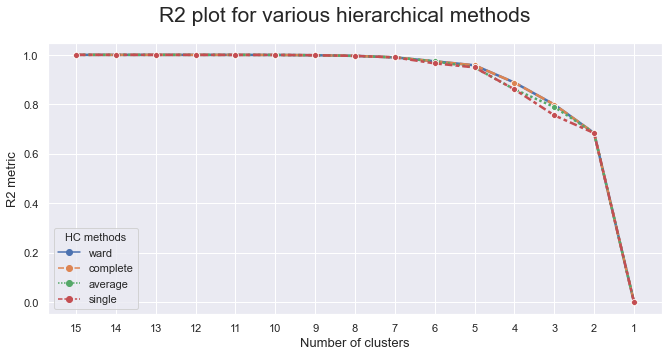

In [53]:
# Prepare input
hc_methods = ["ward", "complete", "average", "single"]

# Call function defined above to obtain the R2 statistic for each hc_method
max_nclus = 15
r2_hc_methods = np.vstack(
    [
        get_r2_hc(df=kmeans_centroids, link_method=link, max_nclus=max_nclus) # CODE HERE 
        for link in hc_methods
    ]
).T
r2_hc_methods = pd.DataFrame(r2_hc_methods, index=range(1, max_nclus + 1), columns=hc_methods)

sns.set()
# Plot data
fig = plt.figure(figsize=(11,5))
sns.lineplot(data=r2_hc_methods, linewidth=2.5, markers=["o"]*4)

# Finalize the plot
fig.suptitle("R2 plot for various hierarchical methods", fontsize=21)
plt.gca().invert_xaxis()  # invert x axis
plt.legend(title="HC methods", title_fontsize=11)
plt.xticks(range(1, max_nclus + 1))
plt.xlabel("Number of clusters", fontsize=13)
plt.ylabel("R2 metric", fontsize=13)

plt.show()

In [54]:
# Performing HC
linkage = 'average'
distance = 'manhattan'
hclust = AgglomerativeClustering(linkage=linkage, affinity=distance,n_clusters=None,distance_threshold=0)
hclust.fit_predict(kmeans_centroids)

array([17, 13, 15, 11, 18,  8, 19, 16, 14,  9, 10,  4, 12,  7,  5,  3,  6,
        1,  2,  0], dtype=int64)

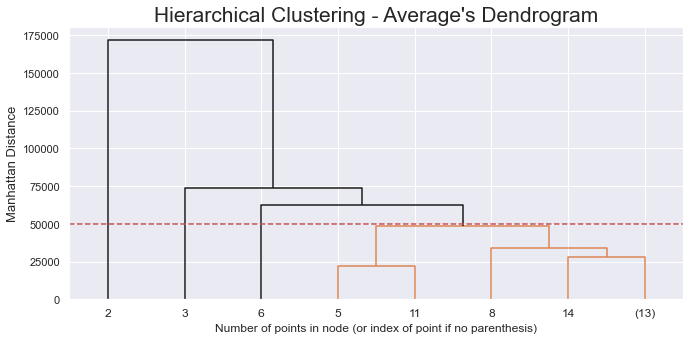

In [55]:
# Adapted from:
# https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html#sphx-glr-auto-examples-cluster-plot-agglomerative-dendrogram-py

# create the counts of samples under each node (number of points being merged)
counts = np.zeros(hclust.children_.shape[0])
n_samples = len(hclust.labels_)

# hclust.children_ contains the observation ids that are being merged together
# At the i-th iteration, children[i][0] and children[i][1] are merged to form node n_samples + i
for i, merge in enumerate(hclust.children_):
    # track the number of observations in the current cluster being formed
    current_count = 0
    for child_idx in merge:
        if child_idx < n_samples:
            # If this is True, then we are merging an observation
            current_count += 1  # leaf node
        else:
            # Otherwise, we are merging a previously formed cluster
            current_count += counts[child_idx - n_samples]
    counts[i] = current_count

# the hclust.children_ is used to indicate the two points/clusters being merged (dendrogram's u-joins)
# the hclust.distances_ indicates the distance between the two points/clusters (height of the u-joins)
# the counts indicate the number of points being merged (dendrogram's x-axis)
linkage_matrix = np.column_stack(
    [hclust.children_, hclust.distances_, counts]
).astype(float)

# Plot the corresponding dendrogram
sns.set()
fig = plt.figure(figsize=(11,5))
# The Dendrogram parameters need to be tuned
y_threshold = 50000
dendrogram(linkage_matrix, truncate_mode='level', p=5, color_threshold=y_threshold, above_threshold_color='k')
plt.hlines(y_threshold, 0, 1000, colors="r", linestyles="dashed")
plt.title(f'Hierarchical Clustering - {linkage.title()}\'s Dendrogram', fontsize=21)
plt.xlabel('Number of points in node (or index of point if no parenthesis)')
plt.ylabel(f'{distance.title()} Distance', fontsize=13)
plt.show()

In [56]:
# 5 cluster solution
# linkage = 'ward'
# distance = 'euclidean'
hc5lust = AgglomerativeClustering(linkage=linkage, affinity=distance, n_clusters=5)
hc5_labels = hc5lust.fit_predict(kmeans_centroids)

In [57]:
hc5_labels

array([0, 0, 3, 2, 0, 1, 4, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

### Put the cluster information in the dataframe

In [58]:
km_results=kmclust.labels_
km_results

array([17, 10, 17, ..., 12, 17, 12])

In [59]:
hc5_labels

array([0, 0, 3, 2, 0, 1, 4, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [60]:
hc_results=np.zeros_like(km_results)
for idx,clust in enumerate(km_results):
    hc_results[idx]=hc5_labels[clust]
hc_results

array([0, 0, 0, ..., 0, 0, 0])

In [61]:
filled_df['Cluster']=pd.Series(hc_results,name='Cluster',index=filled_df.index)

In [62]:
filled_df['Cluster'].value_counts()

0    10266
1        2
2        1
3        1
4        1
Name: Cluster, dtype: int64

In [63]:
filled_df.groupby('Cluster').mean()

,FirstPolYear,BirthYear,MonthSal,GeoLivArea,Children,CustMonVal,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,PremWork
Cluster,,,,,,,,,,,,
0,1986.014904,1967.991623,2499.37142,2.708877,0.707643,202.85296,0.70289,299.229592,208.602713,168.1027,41.474119,40.631188
1,1988.000000,1973.500000,44852.50000,4.000000,0.500000,365.57000,0.53500,169.420000,253.100000,162.9200,99.130000,113.910000
2,1974.000000,1963.000000,3279.00000,3.000000,1.000000,-64891.00000,96.00000,410.300000,117.250000,95.3500,37.340000,22.560000
3,1990.000000,1989.000000,1086.00000,4.000000,1.000000,-165680.42000,256.20000,378.070000,78.900000,166.8100,6.890000,18.450000
4,53784.000000,1948.000000,3268.00000,1.000000,0.000000,348.85000,0.37000,351.400000,15.000000,187.3700,22.450000,17.780000


In [64]:
filled_df[filled_df['Cluster']==4]

,FirstPolYear,BirthYear,MonthSal,GeoLivArea,Children,CustMonVal,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,PremWork,EducDeg,Cluster
9294,53784.0,1948.0,3268.0,1.0,0.0,348.85,0.37,351.4,15.0,187.37,22.45,17.78,b'3 - BSc/MSc',4


## Self Organizing Map

In [65]:
import sompy
from sompy.visualization.mapview import View2D
from sompy.visualization.bmuhits import BmuHitsView
from sompy.visualization.hitmap import HitMapView

In [66]:
np.random.seed(42)

sm = sompy.SOMFactory().build(
    filled_df[metric_features].values, 
    mapsize=[25, 25],
    initialization='random', 
    neighborhood='gaussian',
    training='batch',
    lattice='hexa',
    component_names=metric_features
)
sm.train(n_job=-1, verbose='info', train_rough_len=200, train_finetune_len=200)

 Training...
 random_initialization took: 0.001000 seconds
 Rough training...
 radius_ini: 9.000000 , radius_final: 1.500000, trainlen: 200

 epoch: 1 ---> elapsed time:  0.047000, quantization error: 35.546239

 epoch: 2 ---> elapsed time:  0.045000, quantization error: 2.699323

 epoch: 3 ---> elapsed time:  0.041000, quantization error: 2.639663

 epoch: 4 ---> elapsed time:  0.048000, quantization error: 2.609873

 epoch: 5 ---> elapsed time:  0.045000, quantization error: 2.601280

 epoch: 6 ---> elapsed time:  0.048000, quantization error: 2.599465

 epoch: 7 ---> elapsed time:  0.053000, quantization error: 2.598487

 epoch: 8 ---> elapsed time:  0.045000, quantization error: 2.597586

 epoch: 9 ---> elapsed time:  0.044000, quantization error: 2.596693

 epoch: 10 ---> elapsed time:  0.045000, quantization error: 2.595794

 epoch: 11 ---> elapsed time:  0.049000, quantization error: 2.594887

 epoch: 12 ---> elapsed time:  0.047000, quantization error: 2.593972

 epoch: 13 --->

 epoch: 115 ---> elapsed time:  0.045000, quantization error: 2.360375

 epoch: 116 ---> elapsed time:  0.048000, quantization error: 2.355433

 epoch: 117 ---> elapsed time:  0.043000, quantization error: 2.350387

 epoch: 118 ---> elapsed time:  0.047000, quantization error: 2.345240

 epoch: 119 ---> elapsed time:  0.044000, quantization error: 2.339981

 epoch: 120 ---> elapsed time:  0.042000, quantization error: 2.334627

 epoch: 121 ---> elapsed time:  0.049000, quantization error: 2.329173

 epoch: 122 ---> elapsed time:  0.059000, quantization error: 2.323620

 epoch: 123 ---> elapsed time:  0.045000, quantization error: 2.317962

 epoch: 124 ---> elapsed time:  0.044000, quantization error: 2.312178

 epoch: 125 ---> elapsed time:  0.051000, quantization error: 2.306265

 epoch: 126 ---> elapsed time:  0.049000, quantization error: 2.300224

 epoch: 127 ---> elapsed time:  0.051000, quantization error: 2.294094

 epoch: 128 ---> elapsed time:  0.047000, quantization error: 2.

 epoch: 29 ---> elapsed time:  0.045000, quantization error: 1.604805

 epoch: 30 ---> elapsed time:  0.045000, quantization error: 1.602044

 epoch: 31 ---> elapsed time:  0.043000, quantization error: 1.599017

 epoch: 32 ---> elapsed time:  0.047000, quantization error: 1.595891

 epoch: 33 ---> elapsed time:  0.044000, quantization error: 1.593280

 epoch: 34 ---> elapsed time:  0.044000, quantization error: 1.590815

 epoch: 35 ---> elapsed time:  0.048000, quantization error: 1.588190

 epoch: 36 ---> elapsed time:  0.045000, quantization error: 1.585440

 epoch: 37 ---> elapsed time:  0.042000, quantization error: 1.582334

 epoch: 38 ---> elapsed time:  0.048000, quantization error: 1.579255

 epoch: 39 ---> elapsed time:  0.045000, quantization error: 1.576428

 epoch: 40 ---> elapsed time:  0.042000, quantization error: 1.573728

 epoch: 41 ---> elapsed time:  0.044000, quantization error: 1.571031

 epoch: 42 ---> elapsed time:  0.045000, quantization error: 1.568350

 epoch

 epoch: 144 ---> elapsed time:  0.046000, quantization error: 1.256636

 epoch: 145 ---> elapsed time:  0.046000, quantization error: 1.253633

 epoch: 146 ---> elapsed time:  0.047000, quantization error: 1.250691

 epoch: 147 ---> elapsed time:  0.045000, quantization error: 1.247739

 epoch: 148 ---> elapsed time:  0.048000, quantization error: 1.244682

 epoch: 149 ---> elapsed time:  0.046000, quantization error: 1.241641

 epoch: 150 ---> elapsed time:  0.046000, quantization error: 1.238683

 epoch: 151 ---> elapsed time:  0.043000, quantization error: 1.235615

 epoch: 152 ---> elapsed time:  0.045000, quantization error: 1.232560

 epoch: 153 ---> elapsed time:  0.045000, quantization error: 1.229635

 epoch: 154 ---> elapsed time:  0.044000, quantization error: 1.226661

 epoch: 155 ---> elapsed time:  0.043000, quantization error: 1.223711

 epoch: 156 ---> elapsed time:  0.046000, quantization error: 1.220798

 epoch: 157 ---> elapsed time:  0.046000, quantization error: 1.

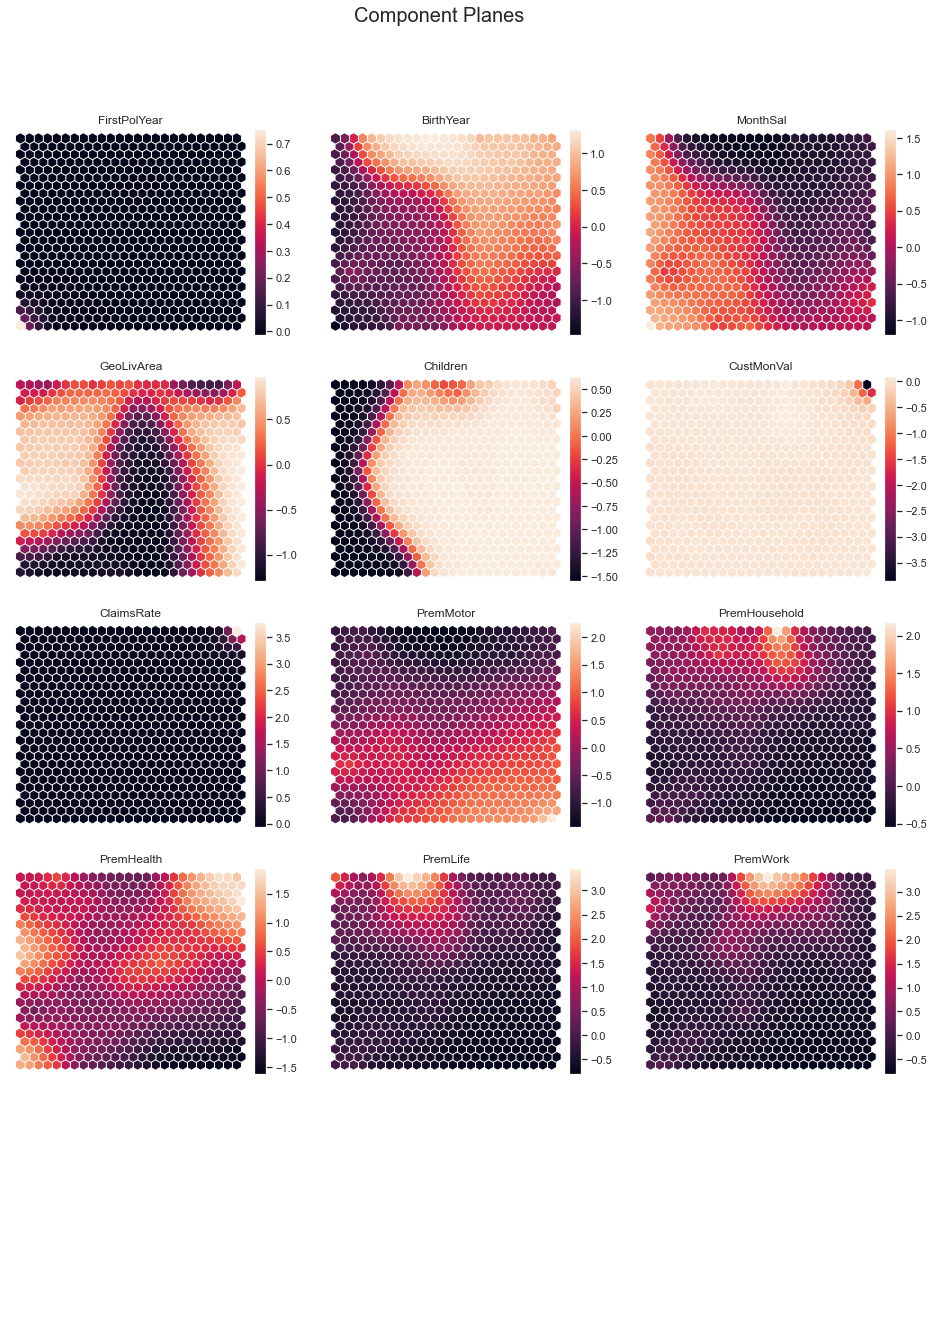

In [67]:
# Visualizing the Component planes (feature values)
sns.set()
view2D = View2D(12, 12, "", text_size=10)
view2D.show(sm, col_sz=3, what='codebook')
plt.subplots_adjust(top=0.90)
plt.suptitle("Component Planes", fontsize=20)
plt.show()

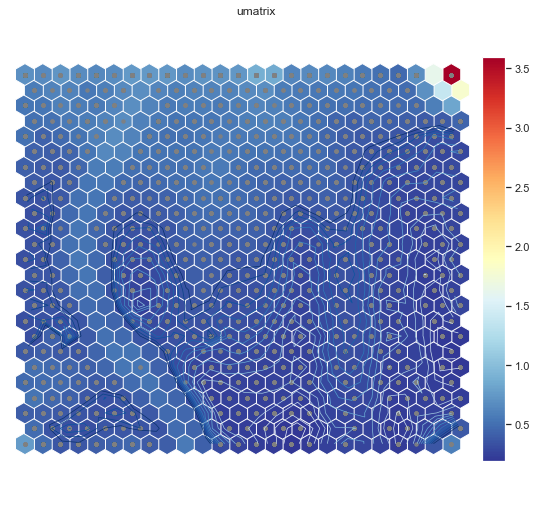

array([[0.70345823, 0.65711096, 0.71976849, 0.67828385, 0.64970266,
        0.67624562, 0.74799345, 0.74976869, 0.73392412, 0.67431446,
        0.71340441, 0.71693861, 0.737142  , 0.88380417, 0.85442202,
        0.63862914, 0.66461034, 0.64027566, 0.60824212, 0.56313718,
        0.51406435, 0.4759397 , 0.68223401, 1.63638047, 3.59660515],
       [0.58569786, 0.61752692, 0.61312645, 0.55713556, 0.58586171,
        0.66147367, 0.68530463, 0.62574264, 0.59446957, 0.62361349,
        0.61922079, 0.61666889, 0.65967886, 0.68464732, 0.58351335,
        0.5655678 , 0.55499961, 0.55725539, 0.54306158, 0.51556493,
        0.48588714, 0.4794507 , 0.69978328, 1.38130321, 1.80728803],
       [0.54512489, 0.54380683, 0.59912455, 0.57732379, 0.57210892,
        0.63682053, 0.67915079, 0.61452318, 0.5647415 , 0.57597848,
        0.57379686, 0.56703782, 0.59249999, 0.62933182, 0.6101221 ,
        0.56991161, 0.53050029, 0.50982121, 0.49574788, 0.48656617,
        0.48171557, 0.4685096 , 0.47311292, 0.

In [68]:
# Here you have U-matrix
u = sompy.umatrix.UMatrixView(9, 9, 'umatrix', show_axis=True, text_size=8, show_text=True)

UMAT = u.show(
    sm, 
    distance=2, 
    row_normalized=False,
    show_data=True, 
    contour=True, # Visualize isomorphic curves
    blob=False
)

np.flip(UMAT[1], axis=1) # U-matrix values - they match with the plot colors

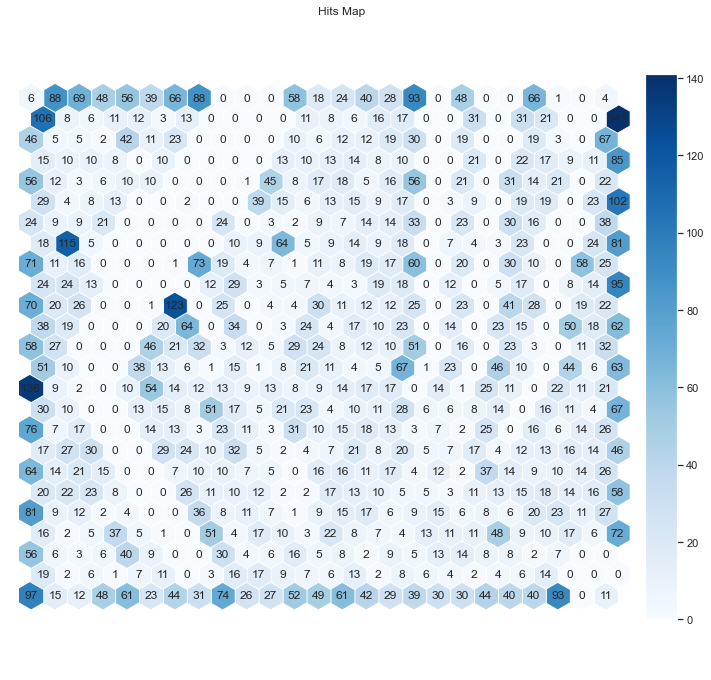

In [69]:
vhts  = BmuHitsView(12,12,"Hits Map")
vhts.show(sm, anotate=True, onlyzeros=False, labelsize=12, cmap="Blues")
plt.show()